In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

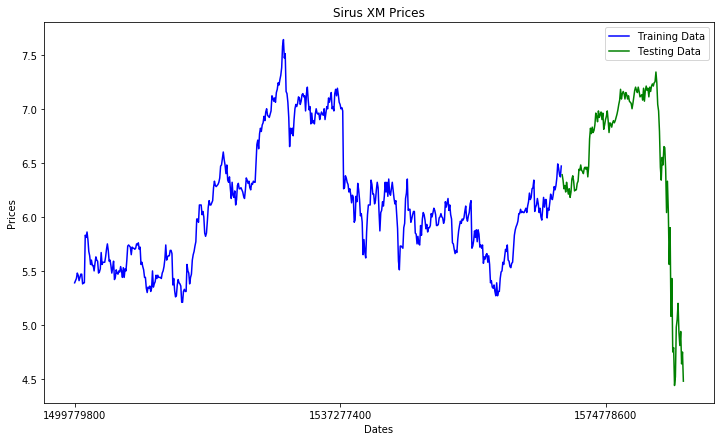

In [6]:
df = pd.read_json (r'SIRI.json')
size = len(df)
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Sirus XM Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['c'], 'blue', label='Training Data')
plt.plot(test_data['c'], 'green', label='Testing Data')
plt.xticks(np.arange(0,size, 300), df['t'][0:size:300])
plt.legend()

In [8]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))
train_ar = train_data['c'].values
test_ar = test_data['c'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.023
Symmetric mean absolute percentage error: 11.193


In [12]:
pd.DataFrame({"Prediction": predictions, 'Actual': test_ar})

,Prediction,Actual
0,[6.467480168039637],6.39
1,[6.396344740499394],6.34
2,[6.344086021598667],6.26
3,[6.264771515390458],6.29
4,[6.289834062043643],6.23
5,[6.234261868202511],6.32
6,[6.3169936885468925],6.26
7,[6.265313256569889],6.21
8,[6.213598509916501],6.26
9,[6.25867570593439],6.18


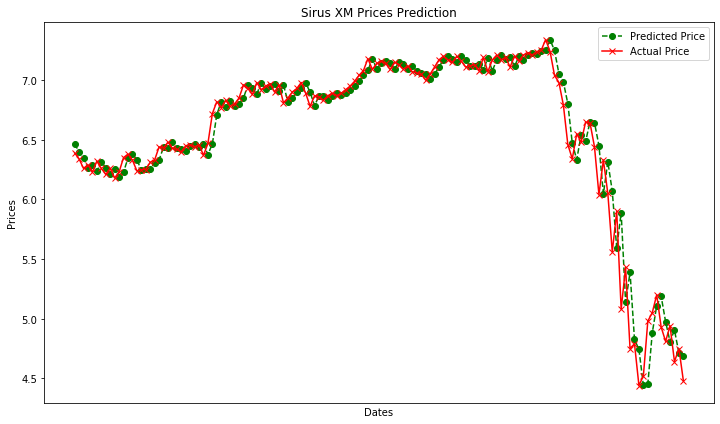

In [19]:
plt.figure(figsize=(12,7))
#plt.plot(df['c'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['c'], color='red', marker='x', label='Actual Price')
plt.title('Sirus XM Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,size, 1300), df['t'][0:size:1300])
plt.legend()